In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import re
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2


pd.options.display.max_rows = 100
pd.options.mode.copy_on_write = True

In [5]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
df = df.sample(500)
df.describe()


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,376.000000,376.000000,0.0,376.000000,0.0,0.0,407.000000,3.000000,376.000000,...,0.0,3.000000,0.0,0.0,0.0,0.0,354.000000,354.000000,0.0,0.0
mean,NaN,2.103723,0.015957,NaN,0.061170,NaN,NaN,1111.013268,626.333333,12.888378,...,NaN,40.000000,NaN,NaN,NaN,NaN,8.997175,8.920904,NaN,NaN
std,NaN,2.599977,0.125478,NaN,0.271259,NaN,NaN,783.870555,524.606837,17.567175,...,NaN,45.177428,NaN,NaN,NaN,NaN,9.208783,9.372037,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,171.000000,0.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,-10.000000,-10.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,383.000000,339.500000,0.175000,...,NaN,15.500000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1038.000000,508.000000,4.625000,...,NaN,31.000000,NaN,NaN,NaN,NaN,10.000000,10.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1644.000000,854.000000,21.430000,...,NaN,60.000000,NaN,NaN,NaN,NaN,16.000000,16.000000,NaN,NaN
max,NaN,19.000000,1.000000,NaN,2.000000,NaN,NaN,3887.000000,1200.000000,100.000000,...,NaN,89.000000,NaN,NaN,NaN,NaN,28.000000,28.000000,NaN,NaN


In [6]:

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [7]:
df.drop(columns=['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime','countries','countries_tags','countries_fr','image_url','image_small_url','states','states_tags','states_fr'],inplace=True)
cols_to_drop = df.filter(regex='_n$').columns
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = df.filter(regex='^state').columns

df.drop(columns=cols_to_drop, inplace=True)

<Axes: >

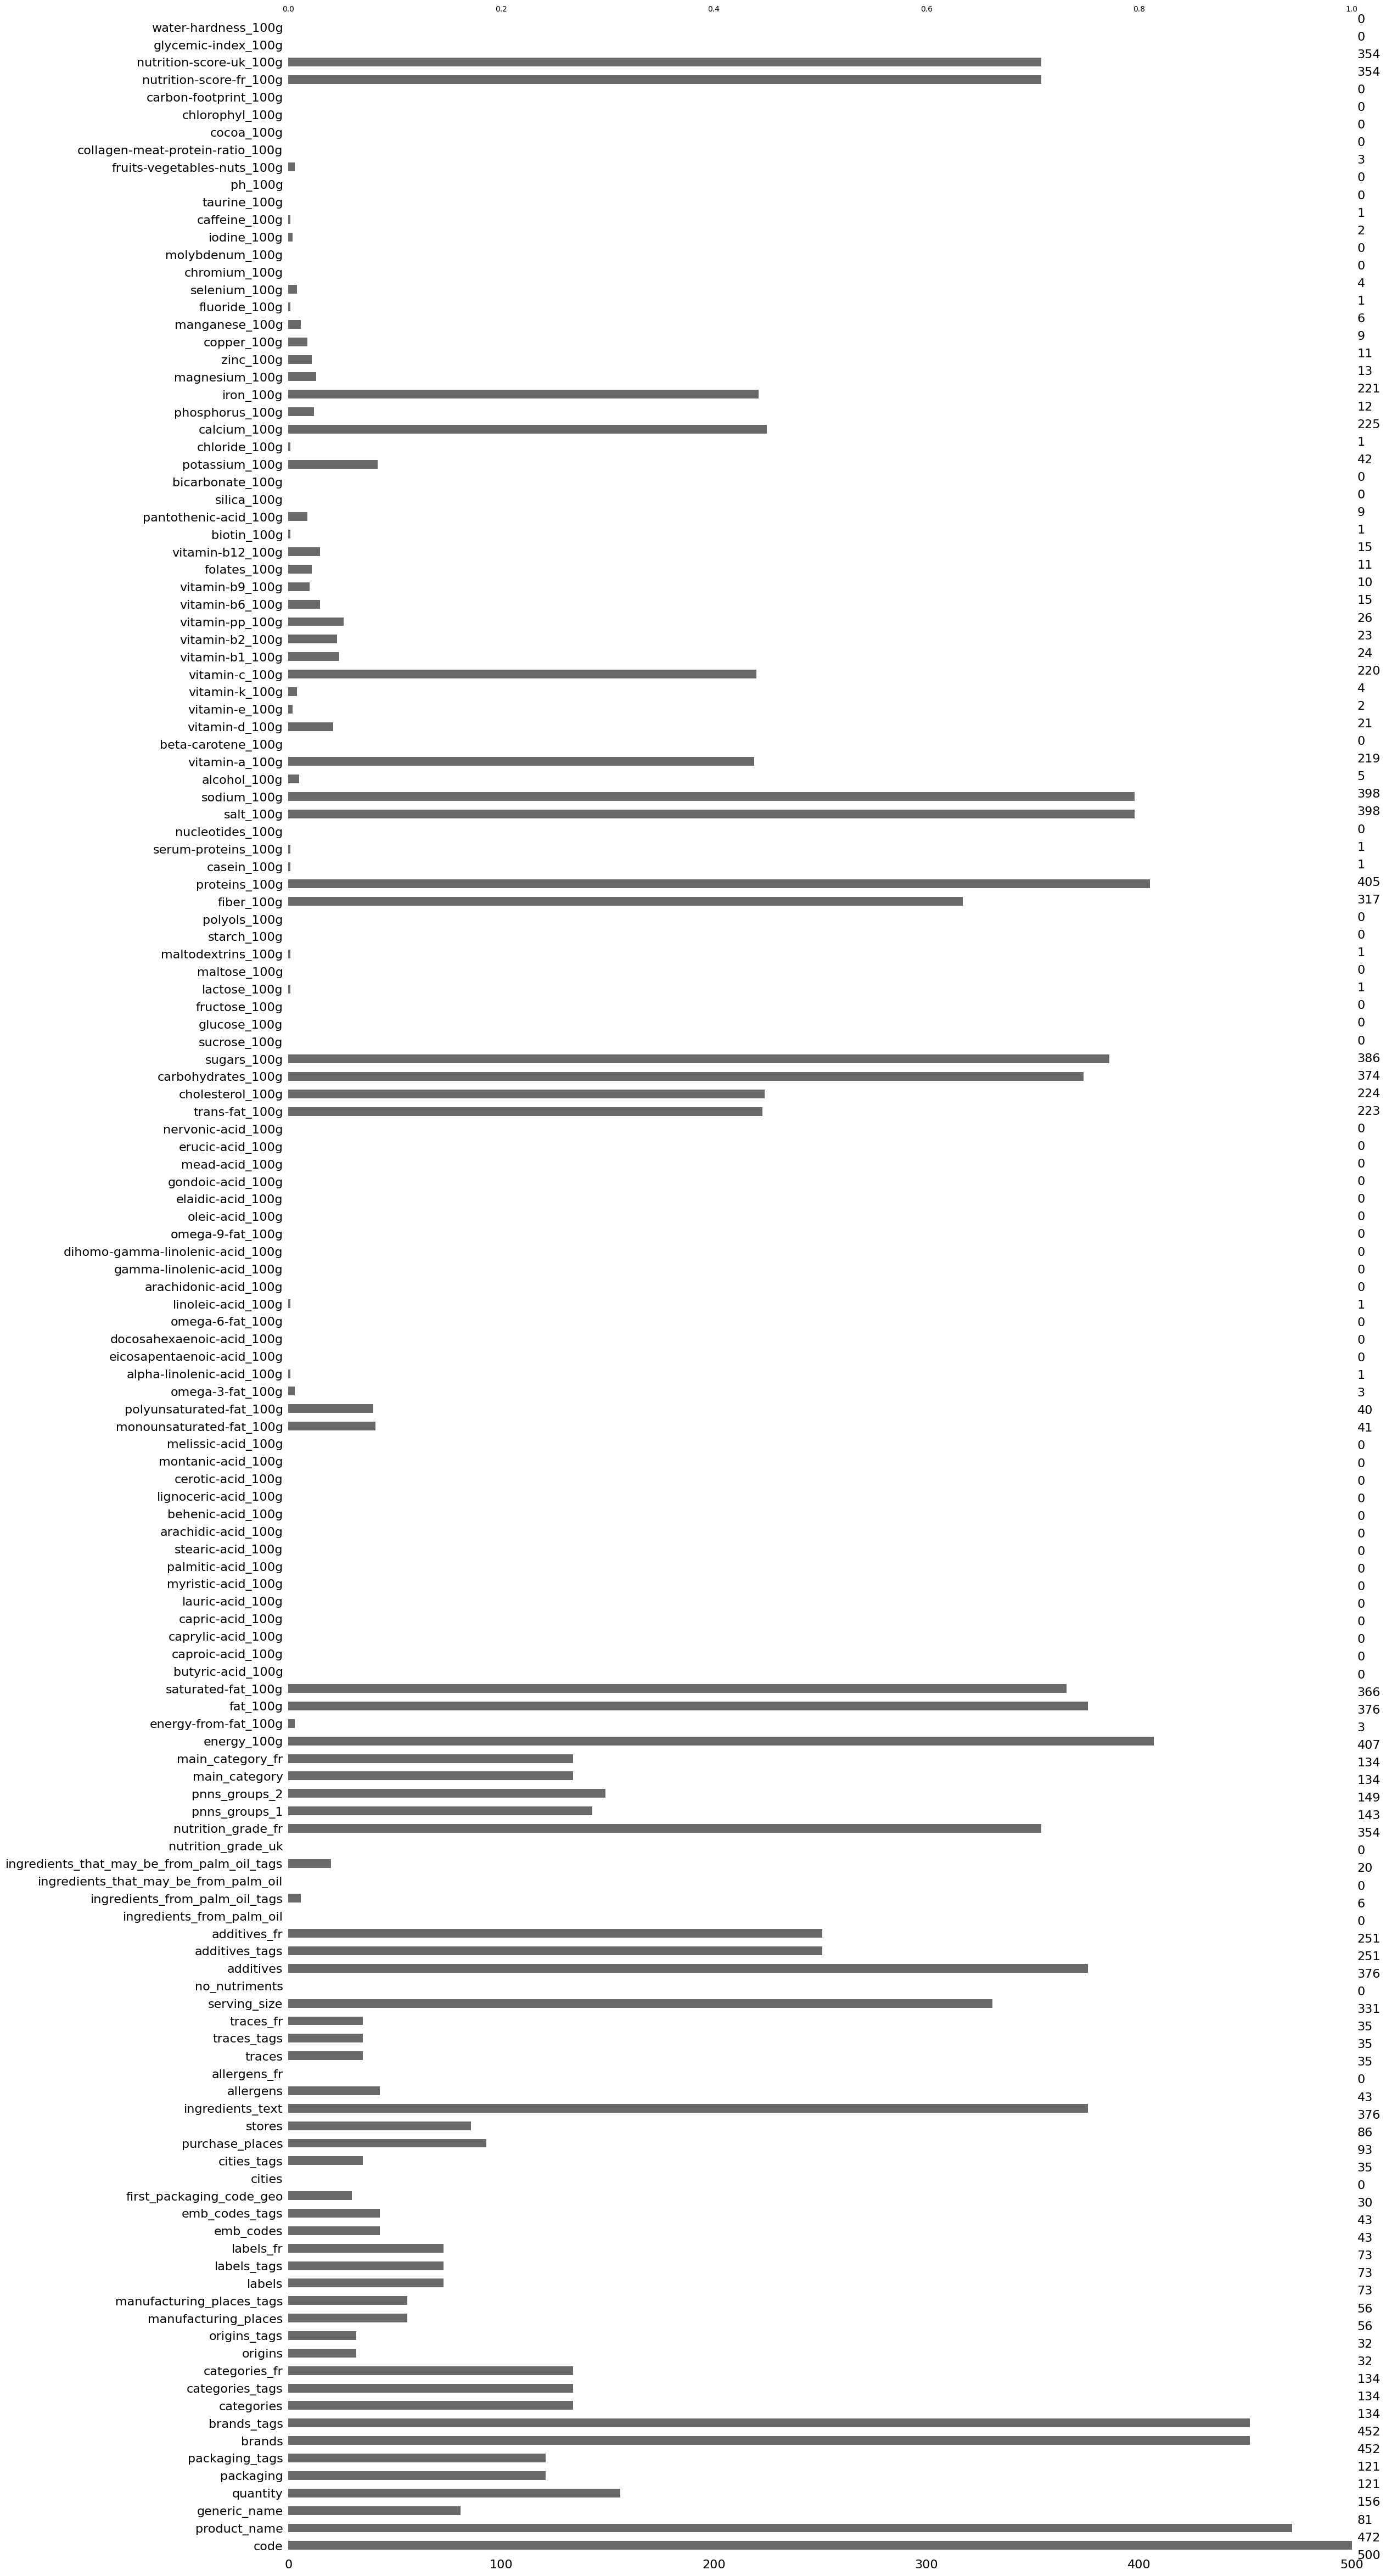

In [8]:
msno.bar(df)

In [9]:

# Calculer le nombre total de lignes
total_rows = len(df)

# Calculer le nombre de valeurs non nulles dans chaque colonne
non_null_counts = df.notna().sum()

# Calculer le taux de remplissage de chaque colonne
filling_rates = non_null_counts / total_rows * 100
filling_rates

# Filtrer les colonnes avec un taux de remplissage entre 20% et 50%
selected_columns = filling_rates[(filling_rates >= 5) ].index
selected_columns
# Conserver uniquement les colonnes sélectionnées
df_cleaned = df[selected_columns]
len(df_cleaned)

500

<Axes: >

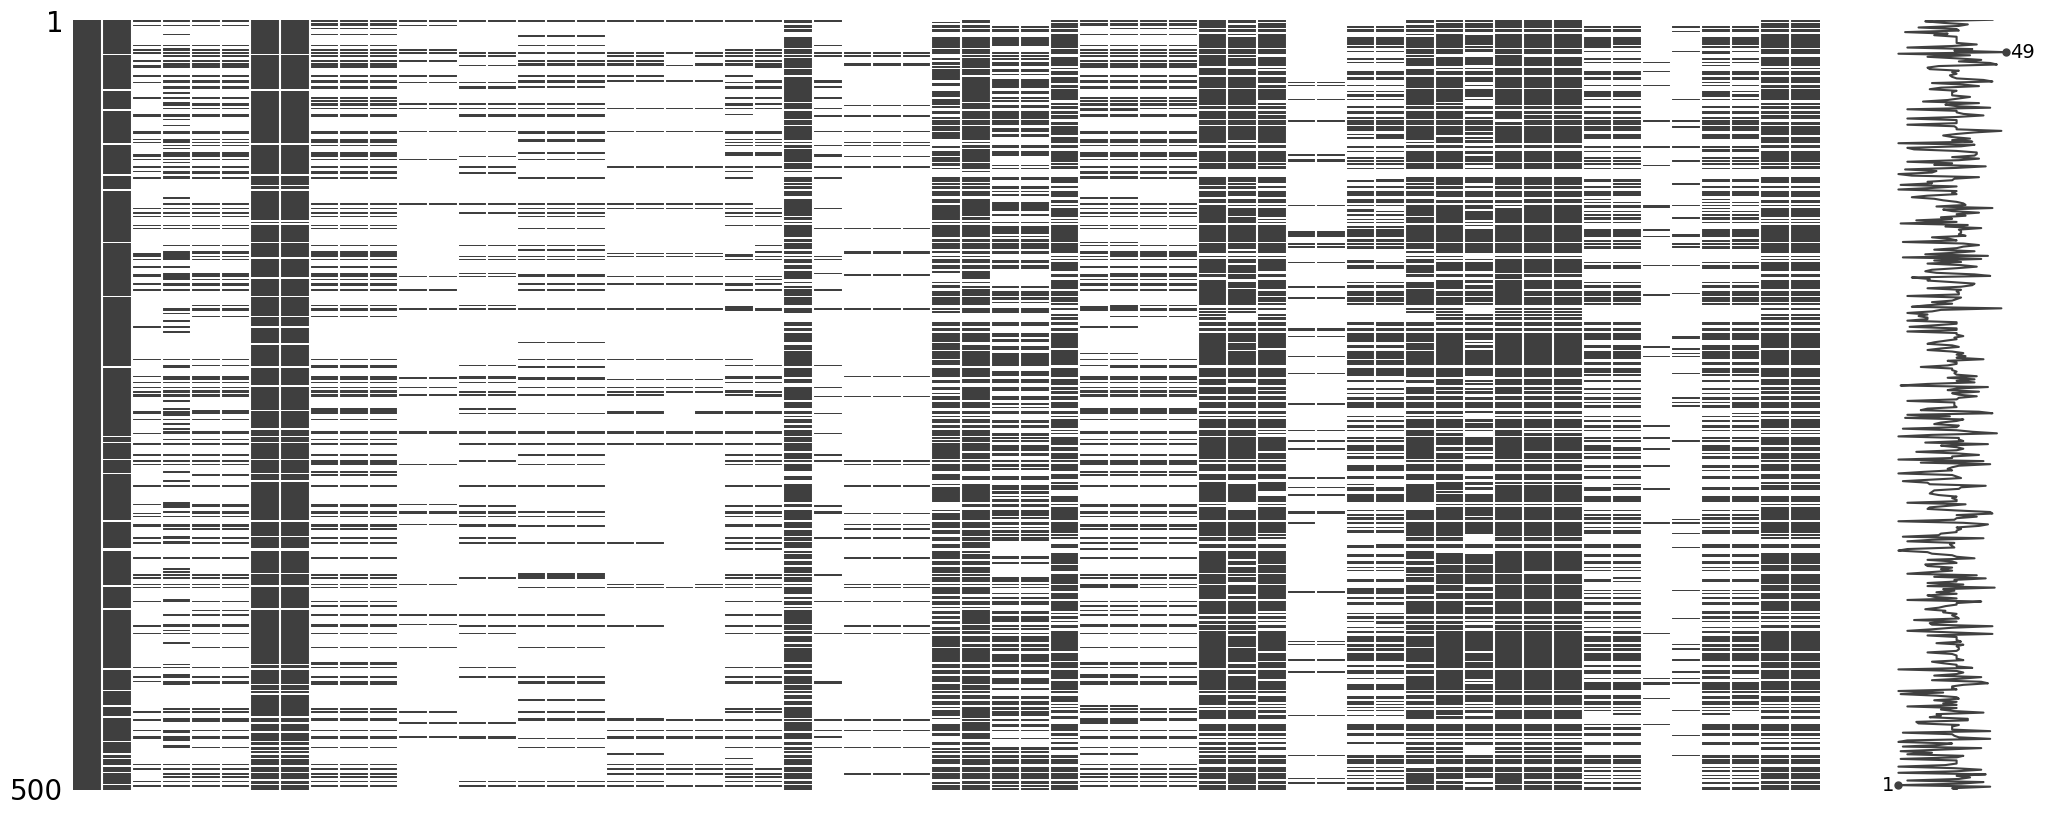

In [10]:
msno.matrix(df_cleaned)

In [11]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])
df_pnns1 = df_cible['pnns_groups_1']

In [12]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()

pnns_groups_1
unknown                    34
Cereals and potatoes       18
Milk and dairy products    18
Sugary snacks              17
Fish Meat Eggs             12
Beverages                  11
Fruits and vegetables      10
Composite foods            10
Fat and sauces              9
Salty snacks                3
fruits-and-vegetables       1
Name: count, dtype: int64


In [13]:
df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"-":" "},regex=True)
df_cleaned['pnns_groups_1']=df_cleaned['pnns_groups_1'].str.lower()
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
unknown                    34
cereals and potatoes       18
milk and dairy products    18
sugary snacks              17
fish meat eggs             12
fruits and vegetables      11
beverages                  11
composite foods            10
fat and sauces              9
salty snacks                3
Name: count, dtype: int64

In [14]:

df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"unknown":np.nan},regex=True)

<Axes: >

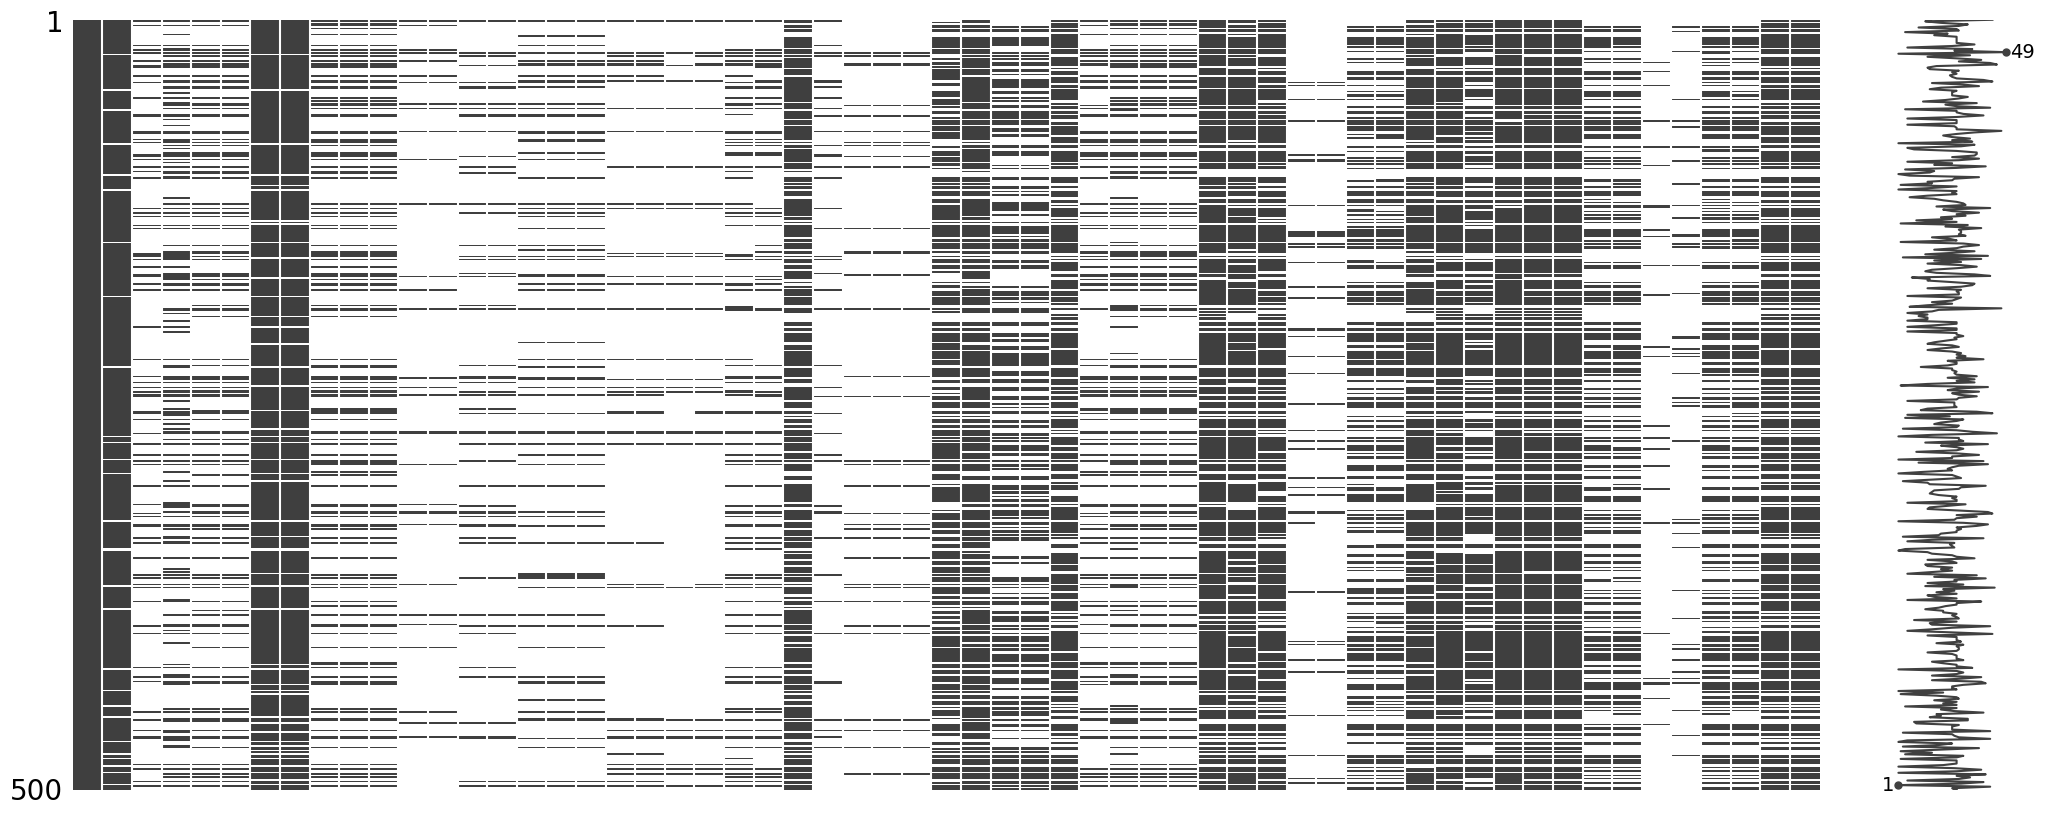

In [15]:
msno.matrix(df_cleaned)

In [16]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])

In [17]:
# Compter le nombre de valeurs non nulles dans la colonne 'ingredients_text'
nombre_de_valeurs_non_nulles = df_cleaned['ingredients_text'].count()

# Calculer le nombre total de lignes dans le DataFrame
nombre_total_de_lignes = len(df_cleaned)

# Calculer le taux de remplissage de la colonne 'ingredients_text'
taux_de_remplissage = (nombre_de_valeurs_non_nulles / nombre_total_de_lignes) * 100
taux_de_remplissage

75.2

In [18]:
df_pnns1 = df_cleaned['pnns_groups_1']

In [19]:
percentages_before = df_cleaned['pnns_groups_1'].value_counts(normalize=True) * 100

In [20]:
df_pnns1 = df_cleaned['pnns_groups_1']
counts = df_pnns1.value_counts()
percentages = counts / len(df_cleaned)*100
print(percentages)

percentages_df = percentages.reset_index()
percentages_df.columns = ['Valeur', 'Pourcentage']
print(percentages_df)

pnns_groups_1
cereals and potatoes       3.6
milk and dairy products    3.6
sugary snacks              3.4
fish meat eggs             2.4
fruits and vegetables      2.2
beverages                  2.2
composite foods            2.0
fat and sauces             1.8
salty snacks               0.6
Name: count, dtype: float64
                    Valeur  Pourcentage
0     cereals and potatoes          3.6
1  milk and dairy products          3.6
2            sugary snacks          3.4
3           fish meat eggs          2.4
4    fruits and vegetables          2.2
5                beverages          2.2
6          composite foods          2.0
7           fat and sauces          1.8
8             salty snacks          0.6


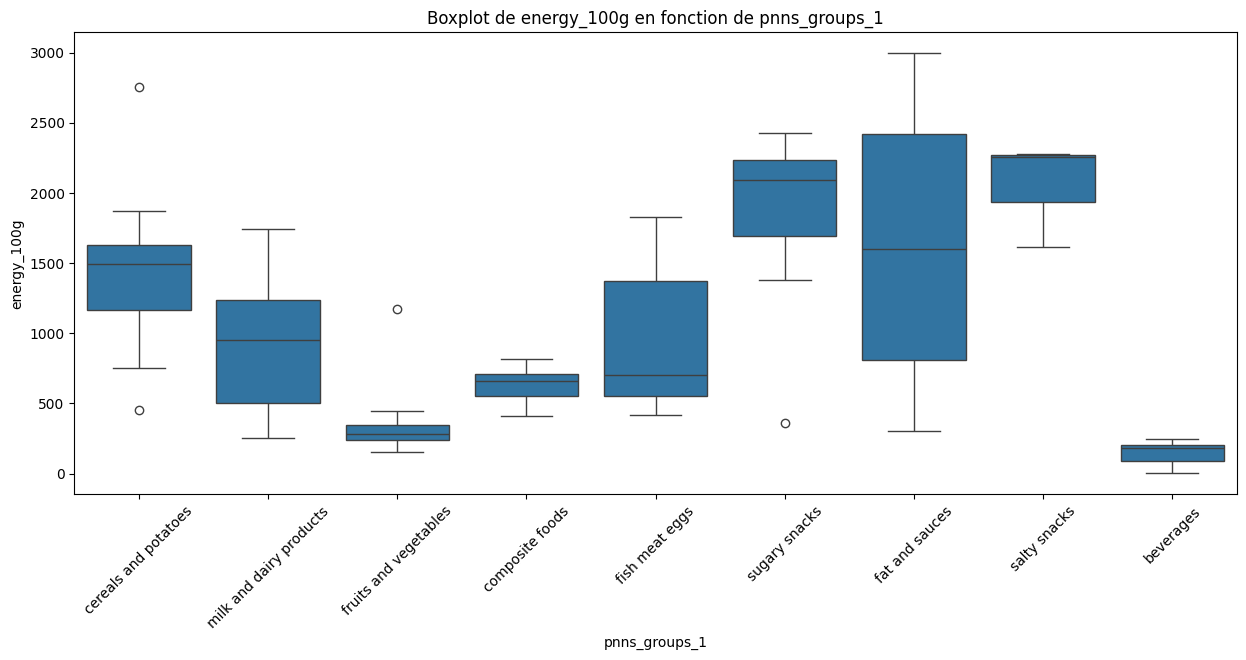

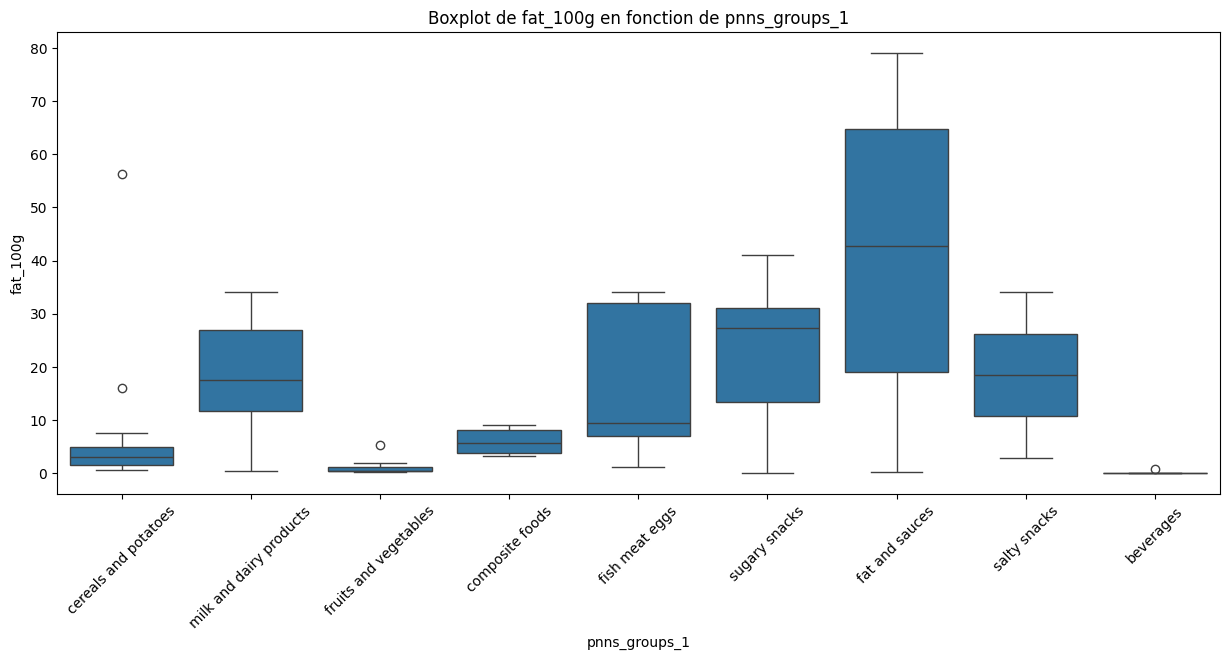

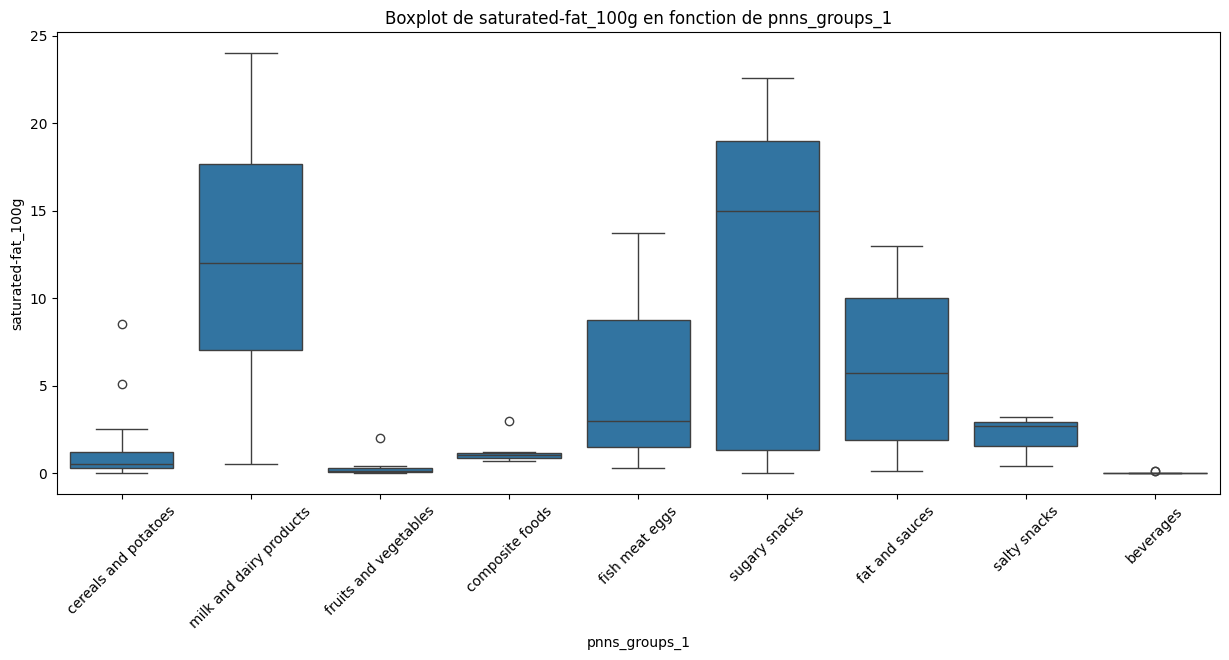

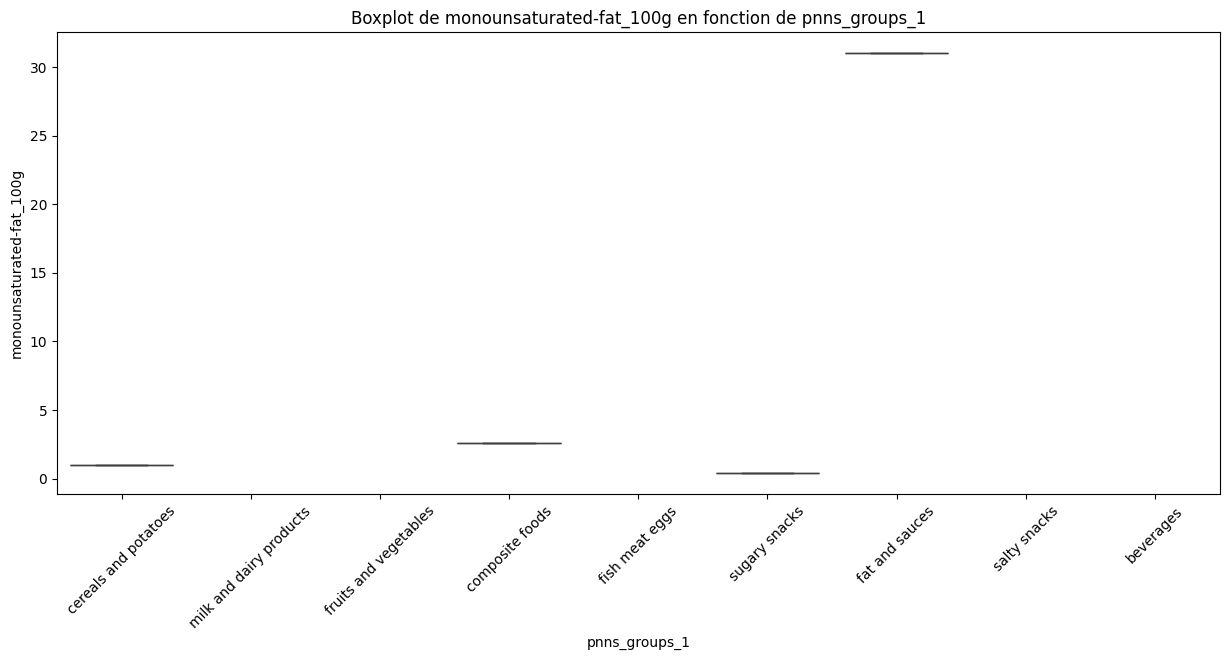

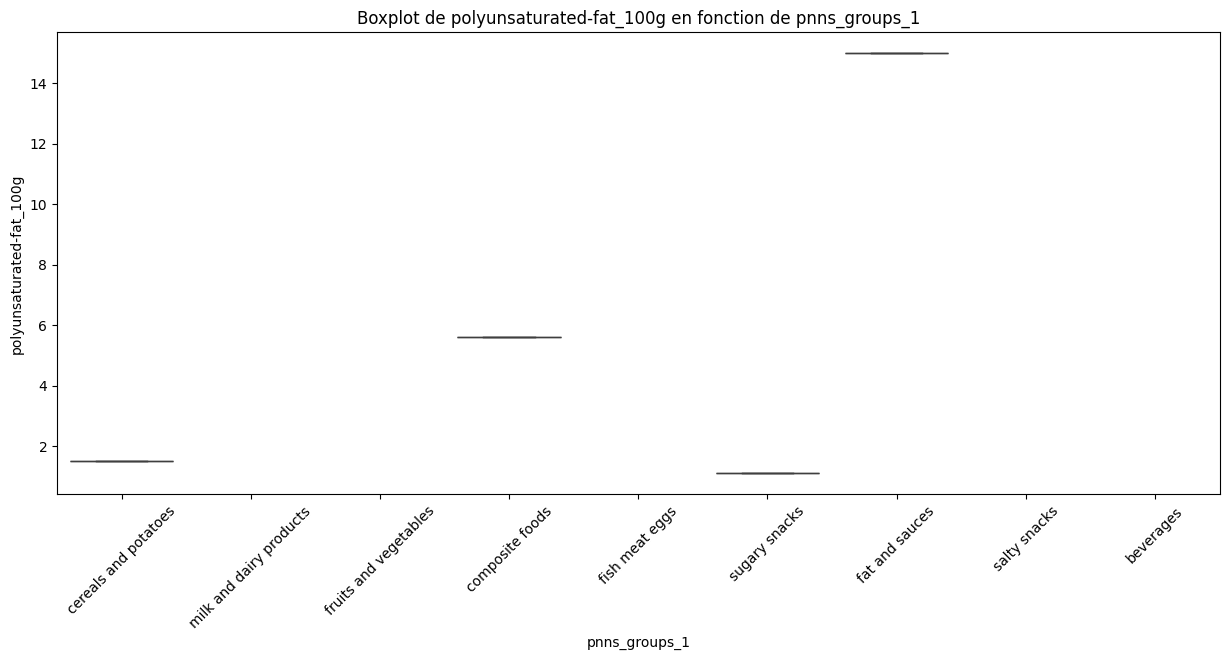

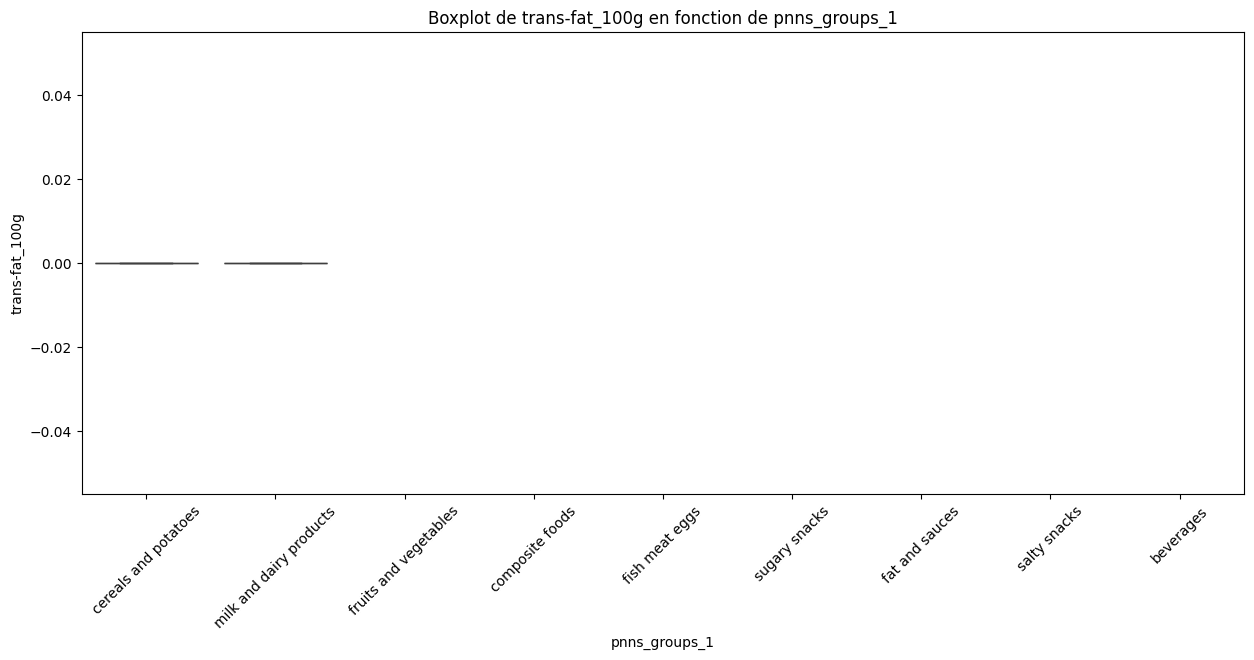

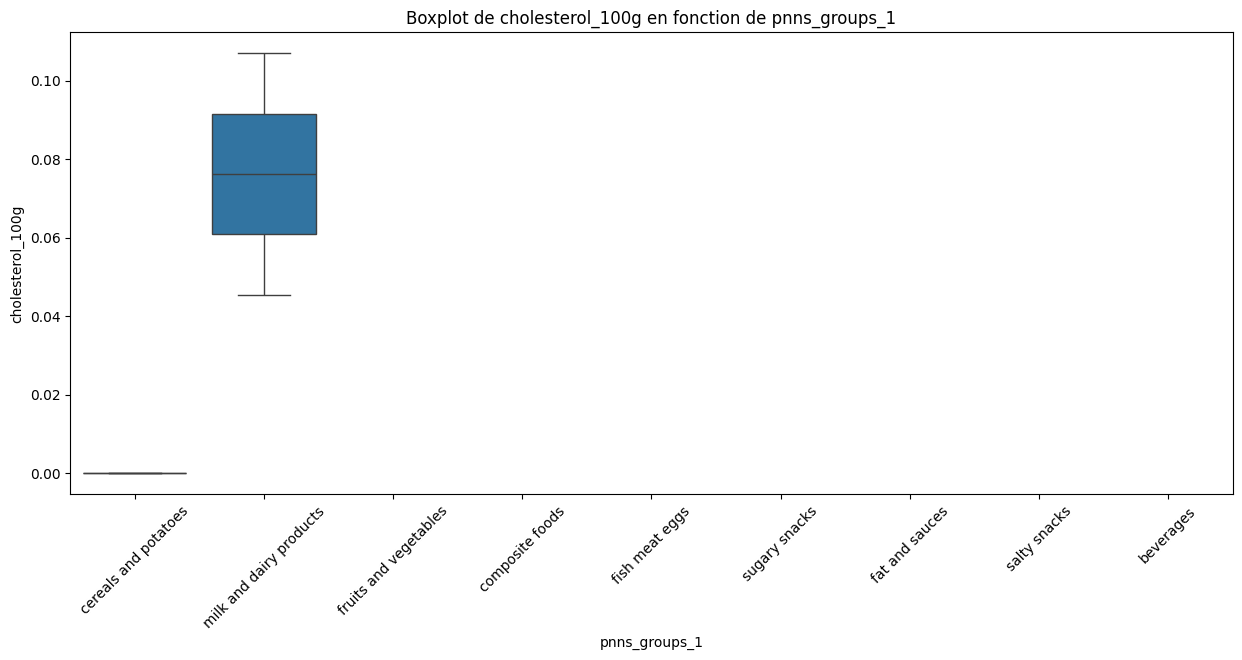

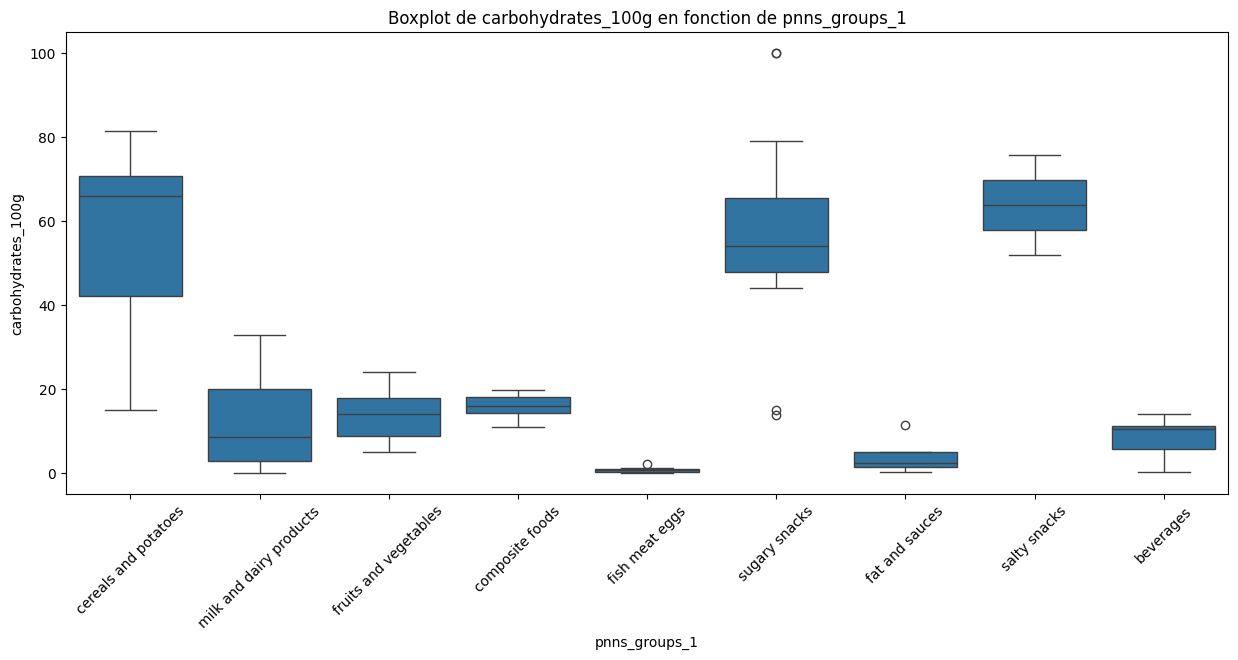

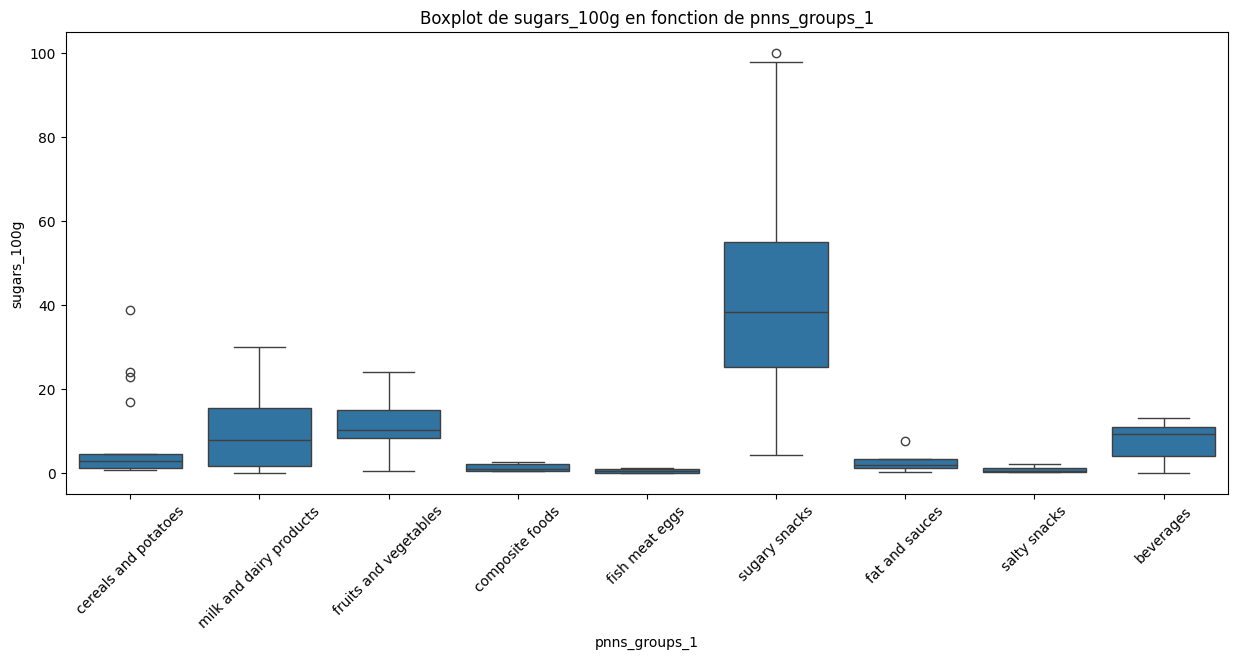

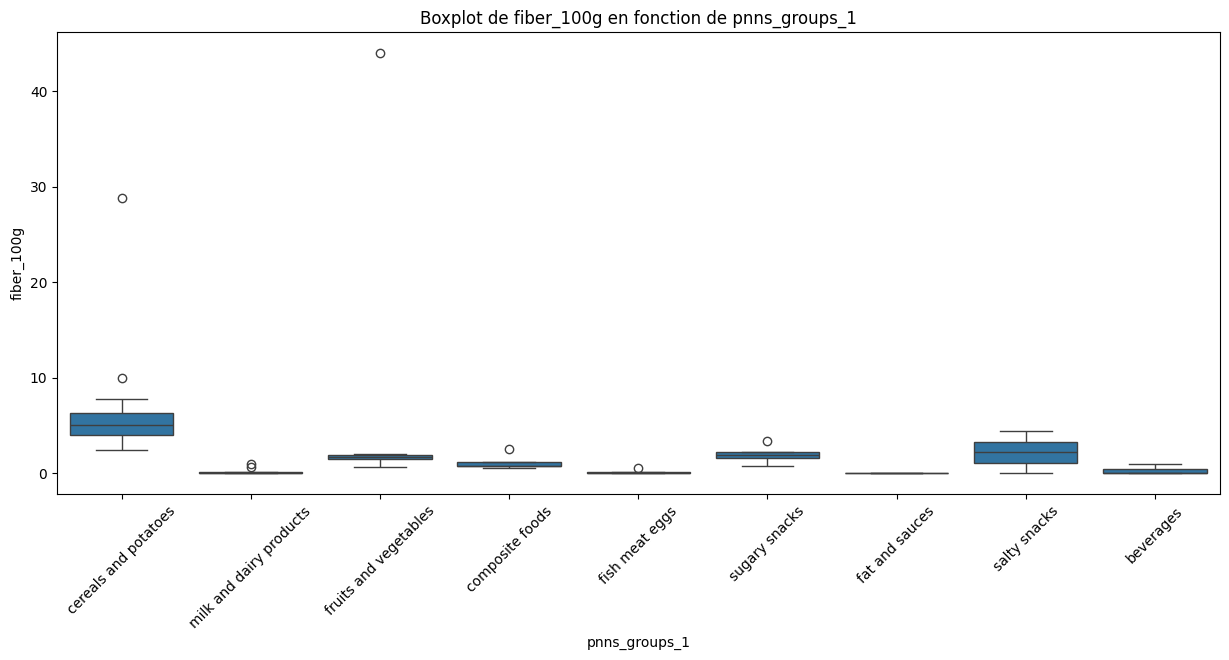

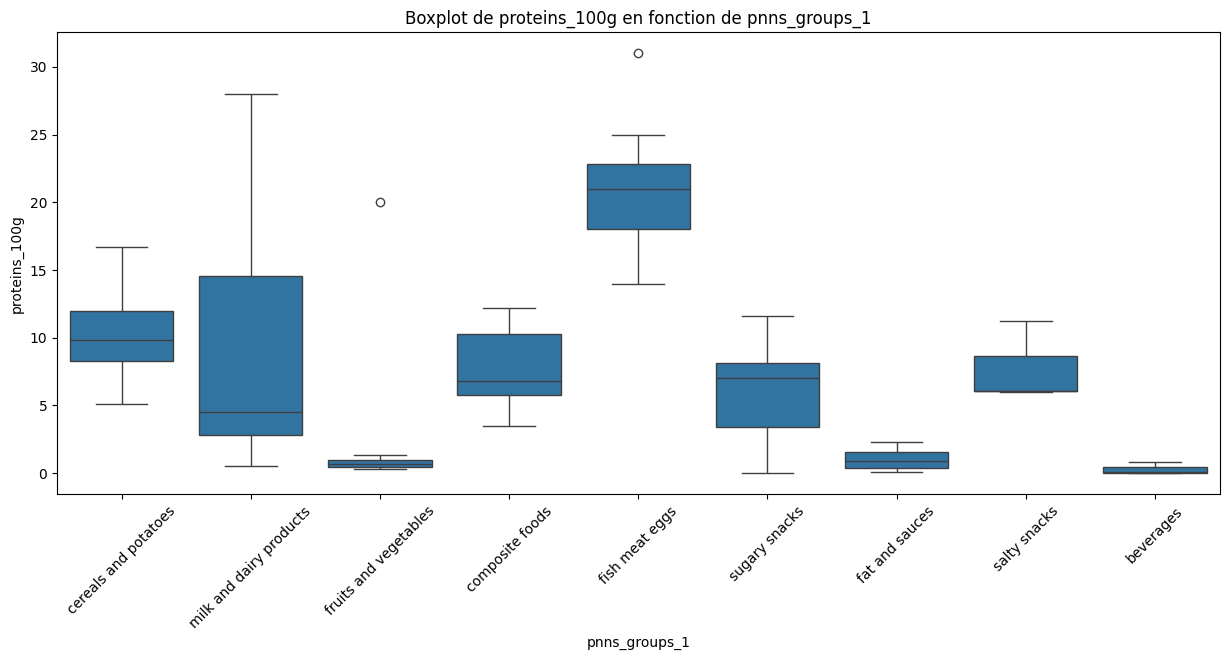

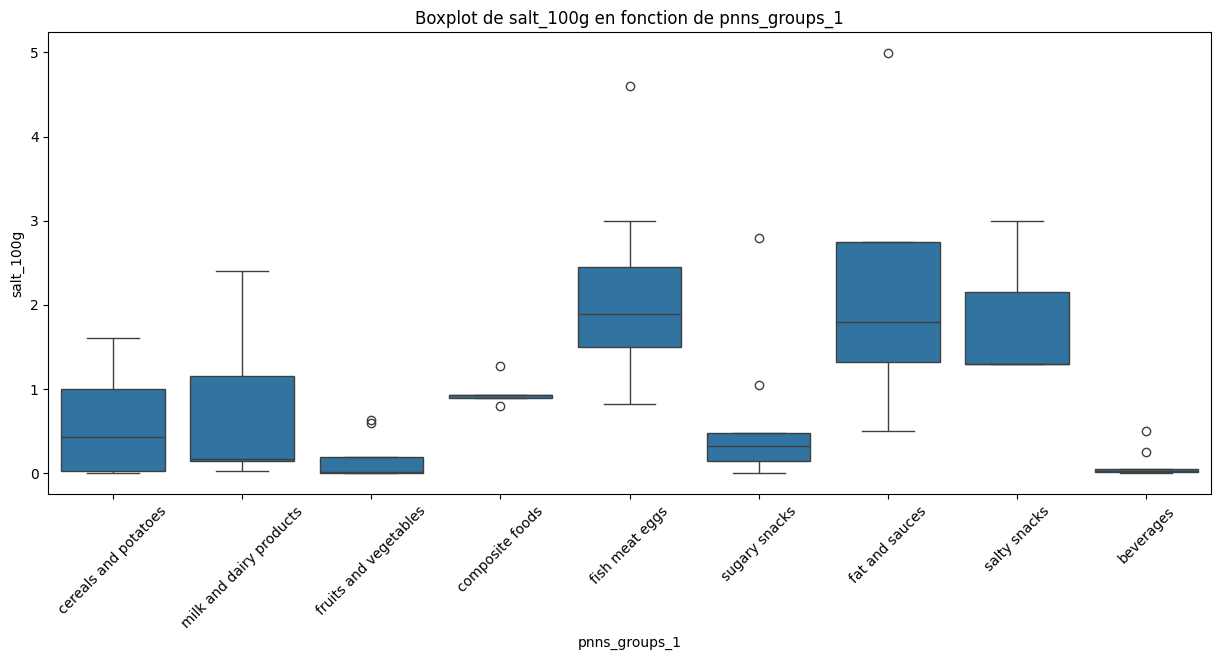

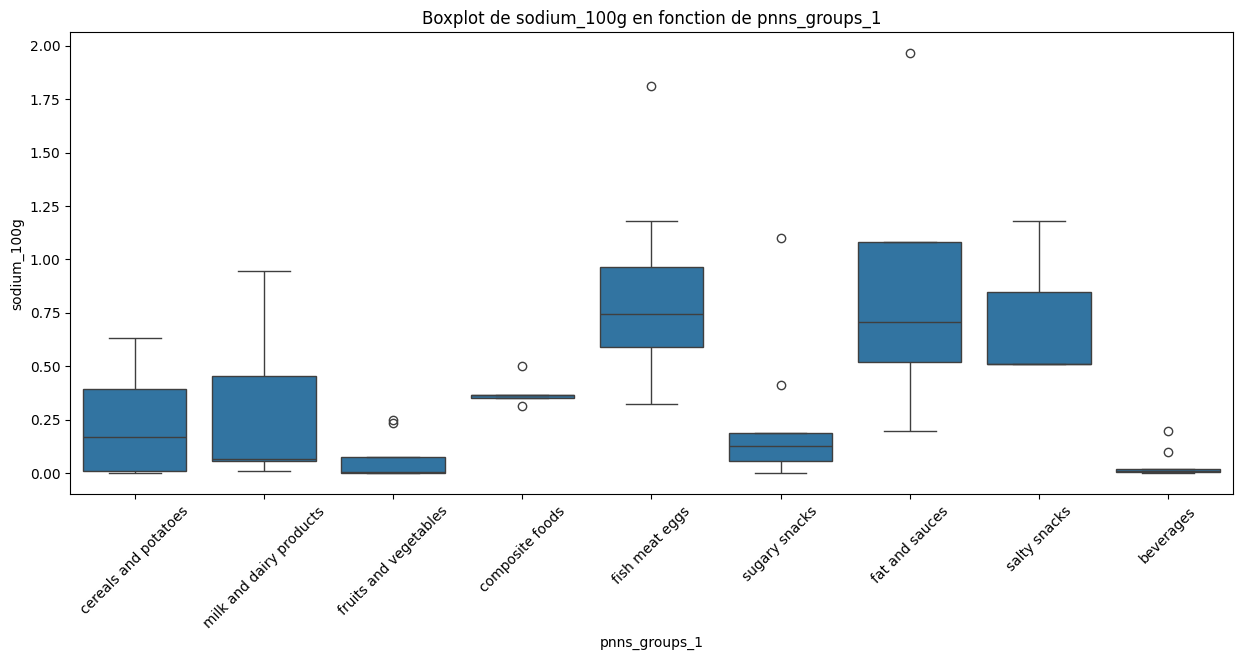

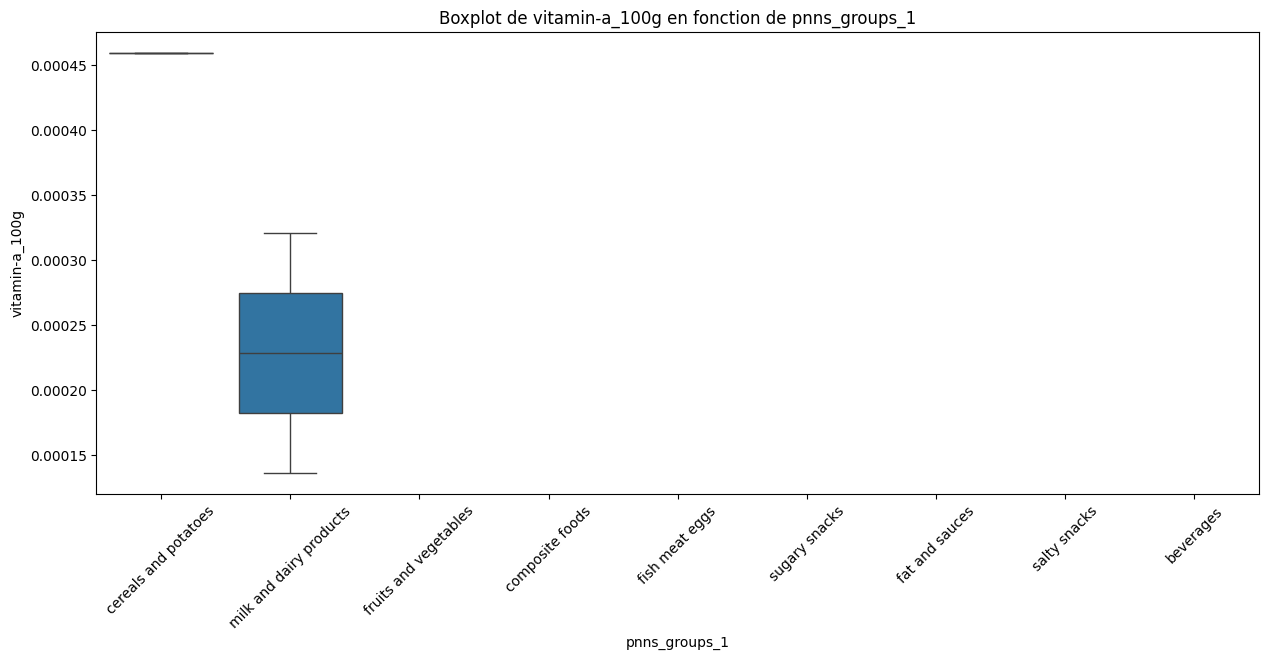

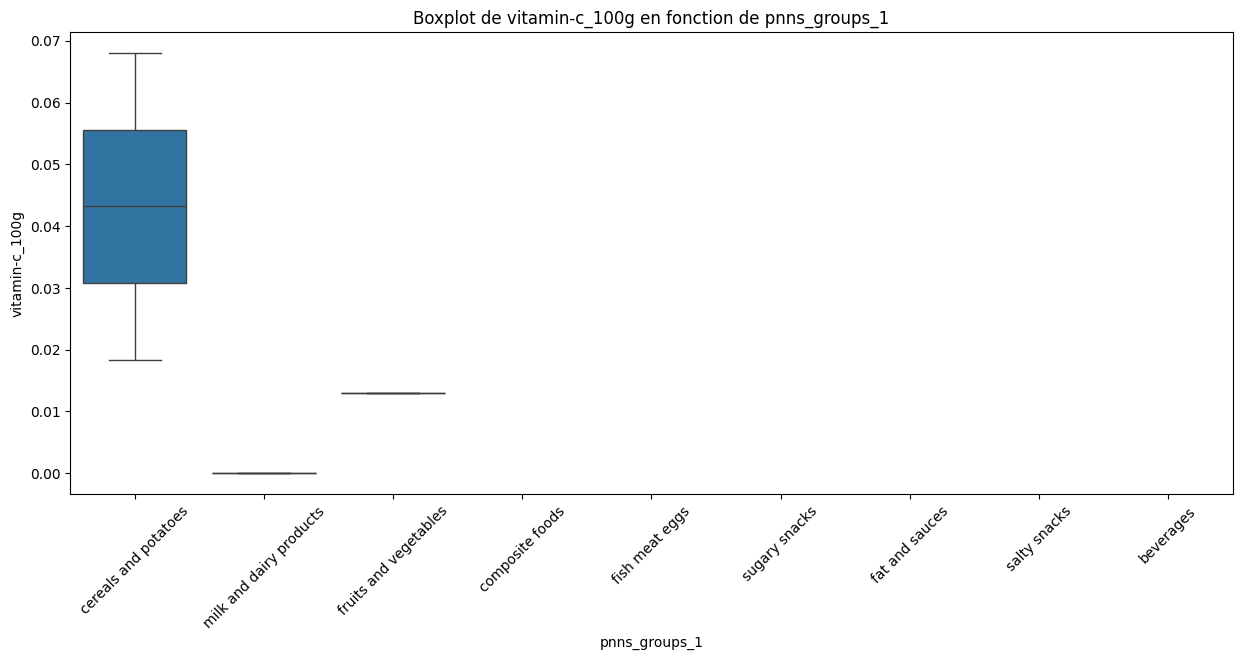

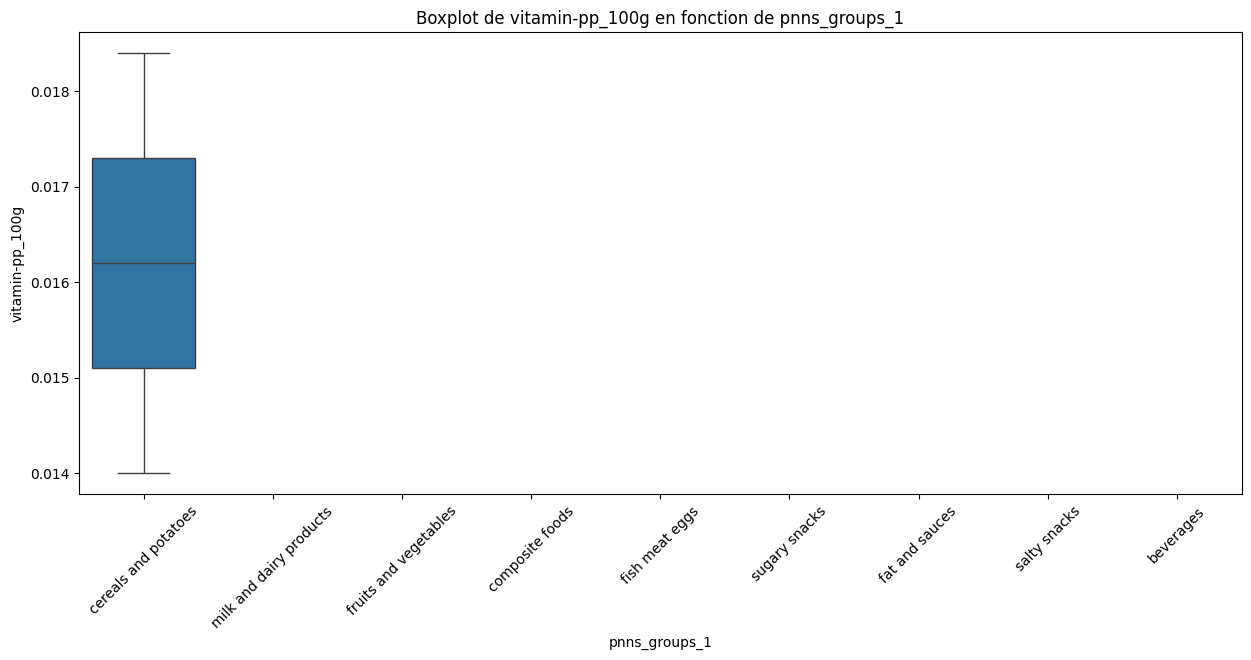

ValueError: List of boxplot statistics and `positions` values must have same the length

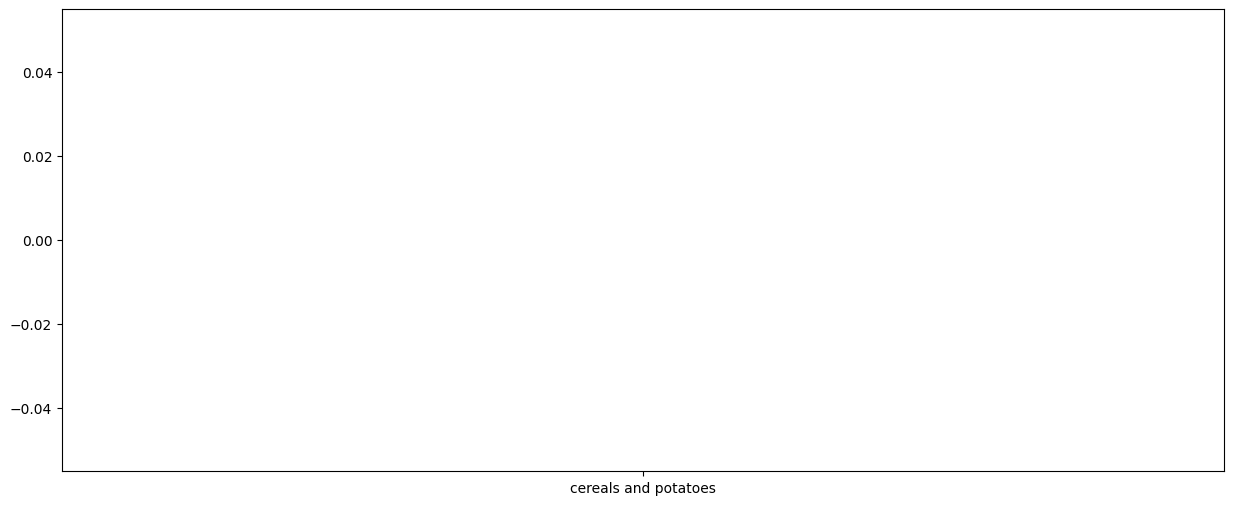

In [21]:
columns_100g = [col for col in df_cleaned.columns if col.endswith('_100g')]
for col in columns_100g:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='pnns_groups_1', y=col, data=df_cleaned)
    plt.title(f'Boxplot de {col} en fonction de pnns_groups_1')
    plt.xlabel('pnns_groups_1')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()


# nettoyage de la colonne ingredients_text


In [23]:
# Fonction pour supprimer le texte entre parenthèses
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r'\([^)]*\)', '', text)  # Supprimer le texte entre parenthèses, y compris les espaces
    else:
        return text  # Retourner la valeur d'origine si ce n'est pas une chaîne de caractères




# Appliquer la fonction à la colonne ingredients_text
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].apply(remove_parentheses)
df_cleaned['ingredients_text']=df_cleaned['ingredients_text'].str.lower()
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.replace('.', '', regex=False)
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.replace('_', ' ', regex=False)
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.strip()
df_cleaned_all = df_cleaned.dropna(subset=['ingredients_text'])


In [24]:
non_alphabetic_pattern = re.compile(r'[^\w\s]')

In [25]:
df_cleaned = df_cleaned[df_cleaned['ingredients_text'].apply(lambda x: isinstance(x, str))]
df_cleaned['has_non_alphabetic_ingredients'] = df_cleaned['ingredients_text'].apply(lambda text: non_alphabetic_pattern.search(text) is not None)
len(df_cleaned)

376

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Séparer les lignes avec et sans valeurs manquantes dans pnns_groups_1
df_missing = df_cleaned[df_cleaned['pnns_groups_1'].isna()]
df_not_missing = df_cleaned[~df_cleaned['pnns_groups_1'].isna()]

In [28]:
# Toutes les classes possibles 
possible_classes = df_cleaned['pnns_groups_1'].unique()

In [29]:
# Encodage des labels textuels en valeurs numériques
label_encoder = LabelEncoder()
label_encoder.fit(possible_classes)


LabelEncoder()

In [30]:
# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_not_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_not_missing['pnns_groups_1'])


In [31]:
# Vectorisation des ingrédients
vectorizer = TfidfVectorizer()
X_not_missing = vectorizer.fit_transform(df_not_missing['ingredients_text'])
y_not_missing = df_not_missing['pnns_groups_1_encoded']


In [32]:
# Division des données non manquantes pour train et test
X_train, X_test, y_train, y_test = train_test_split(X_not_missing, y_not_missing, test_size=0.3, random_state=42)


In [33]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)


In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Prédiction 
y_pred_encoded = knn.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_original = label_encoder.inverse_transform(y_test)

In [36]:

# Évaluation
print("Accuracy:", accuracy_score(y_test_original, y_pred))
print(classification_report(y_test_original, y_pred, zero_division=0))

Accuracy: 0.4074074074074074
                         precision    recall  f1-score   support

              beverages       0.20      1.00      0.33         1
   cereals and potatoes       0.56      0.83      0.67         6
        composite foods       1.00      0.25      0.40         4
         fat and sauces       0.50      0.33      0.40         3
         fish meat eggs       0.20      0.50      0.29         2
  fruits and vegetables       1.00      0.20      0.33         5
milk and dairy products       0.50      0.50      0.50         2
          sugary snacks       0.00      0.00      0.00         4

               accuracy                           0.41        27
              macro avg       0.49      0.45      0.36        27
           weighted avg       0.57      0.41      0.38        27



In [46]:
pd_echantillon = pd.DataFrame([y_test_original, y_pred]).T
pd_echantillon.columns=['original','prediction']
pd_echantillon

,original,prediction
0,composite foods,cereals and potatoes
1,fat and sauces,beverages
2,cereals and potatoes,cereals and potatoes
3,milk and dairy products,sugary snacks
4,cereals and potatoes,cereals and potatoes
5,composite foods,composite foods
6,cereals and potatoes,cereals and potatoes
7,sugary snacks,beverages
8,fat and sauces,fat and sauces
9,fish meat eggs,fish meat eggs


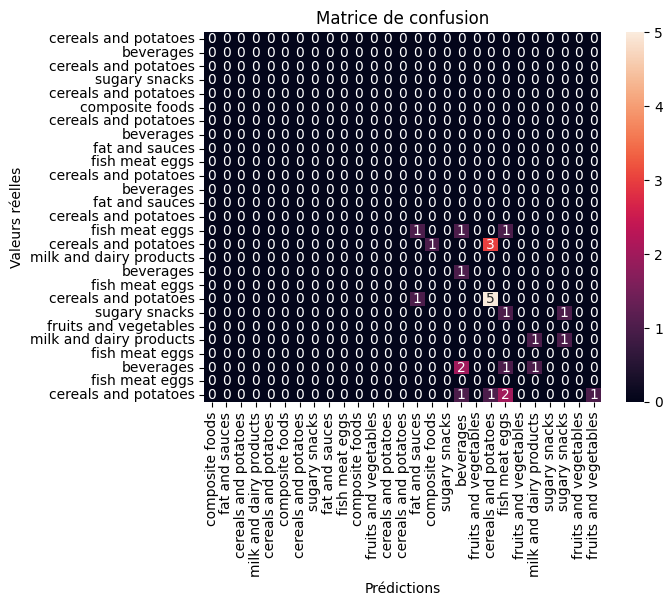

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_original, y_pred, labels=y_test_original)
sns.heatmap(cm, annot=True, xticklabels=y_test_original, yticklabels=y_pred)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

In [39]:

# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_missing['pnns_groups_1'])

X_missing = vectorizer.transform(df_missing['ingredients_text'])

In [40]:
# Prédiction des valeurs manquantes
missing_pred_encoded = knn.predict(X_missing)

In [41]:
# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
missing_pred = label_encoder.inverse_transform(missing_pred_encoded)
missing_pred.shape[0]

286

<Axes: >

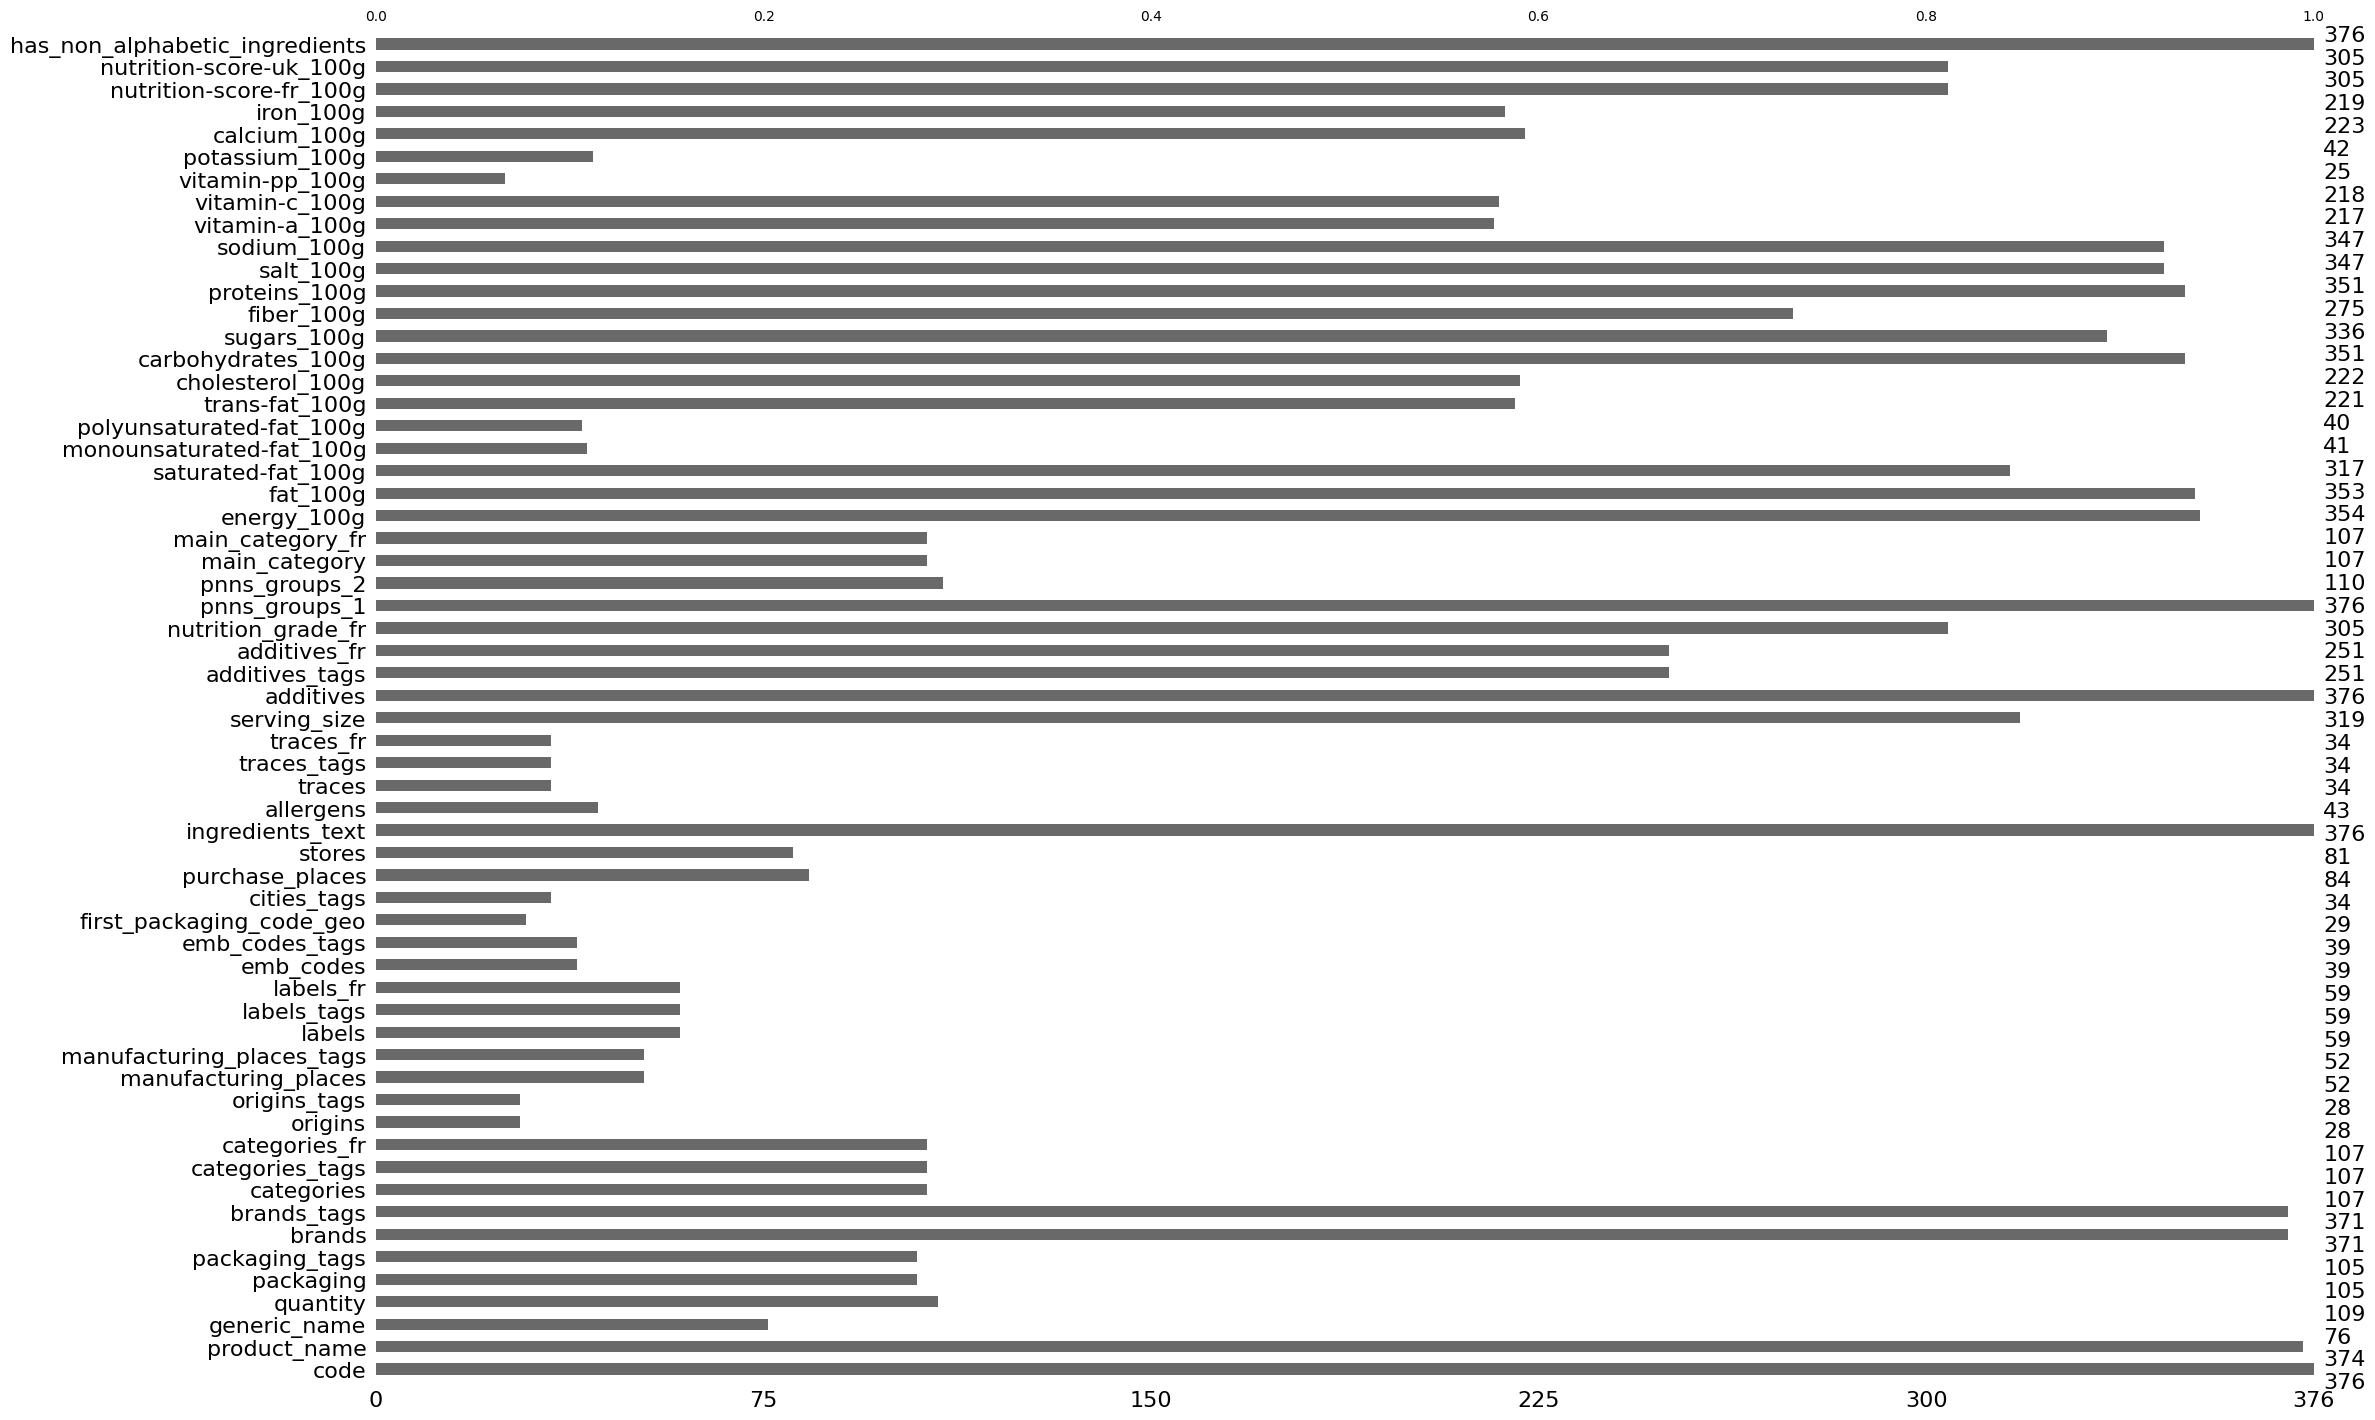

In [42]:
# Ajout des prédictions au DataFrame d'origine
df_cleaned.loc[df_missing.index, 'pnns_groups_1'] = missing_pred
msno.bar(df_cleaned)

In [43]:
df_pnns2 = df_cleaned['pnns_groups_1']
counts = df_pnns2.value_counts()
percentages_after = df_cleaned['pnns_groups_1'].value_counts(normalize=True) * 100
# Créer un DataFrame combiné pour la comparaison
percentages_comparison = pd.DataFrame({
    'Classe': percentages_before.index,
    'Pourcentage_Avant': percentages_before.values,
    'Pourcentage_Apres': percentages_after[percentages_before.index].values
})
fig = px.bar(percentages_comparison, x='Classe', y=['Pourcentage_Avant', 'Pourcentage_Apres'],
             barmode='group',
             labels={'value': 'Pourcentage (%)', 'variable': 'Condition'},
             title='Comparaison des pourcentages avant et après prédiction')

# Afficher le graphique
fig.show()